In [9]:
import pandas as pd
import os
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
path = "../data/"
train_path = os.path.join(path, "train.csv")
train = pd.read_csv(train_path, encoding='utf-8')
test_path = os.path.join(path, "test.csv")
test = pd.read_csv(test_path, encoding='utf-8')
display(train.head())
train.info()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

In [4]:
print(list(train.columns))
train['medical_history'].fillna("nomal", inplace=True)
train['family_medical_history'].fillna("nomal", inplace=True)
train['edu_level'].fillna('middle school diploma', inplace=True)
train['mean_working'].fillna(0.0, inplace=True)

['ID', 'gender', 'age', 'height', 'weight', 'cholesterol', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose', 'bone_density', 'activity', 'smoke_status', 'medical_history', 'family_medical_history', 'sleep_pattern', 'edu_level', 'mean_working', 'stress_score']


C:\Users\gd980\AppData\Local\Temp\ipykernel_3632\886627696.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['mean_working'].fillna(0.0, inplace=True)


In [ ]:
def encoding(df, col):
  df = df.copy()
  encoder = LabelEncoder()
  encoded = encoder.fit_transform(df[col])
  return encoded

exclude_list = []
for i in range(len(train.columns)):
  if train.dtypes[i] == "object":
    print(f"{train.columns[i]}'s type is {train.dtypes[i]}")
    col = train.columns[i]
    exclude_list.append(col)
    train[col] = encoding(train, col)
    test[col] = encoding(test, col)

ID's type is object
gender's type is object
activity's type is object
smoke_status's type is object
medical_history's type is object
family_medical_history's type is object
sleep_pattern's type is object
edu_level's type is object


C:\Users\gd980\AppData\Local\Temp\ipykernel_3632\4143951237.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if train.dtypes[i] == "object":
C:\Users\gd980\AppData\Local\Temp\ipykernel_3632\4143951237.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{train.columns[i]}'s type is {train.dtypes[i]}")
C:\Users\gd980\AppData\Local\Temp\ipykernel_3632\4143951237.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if train

<Axes: >

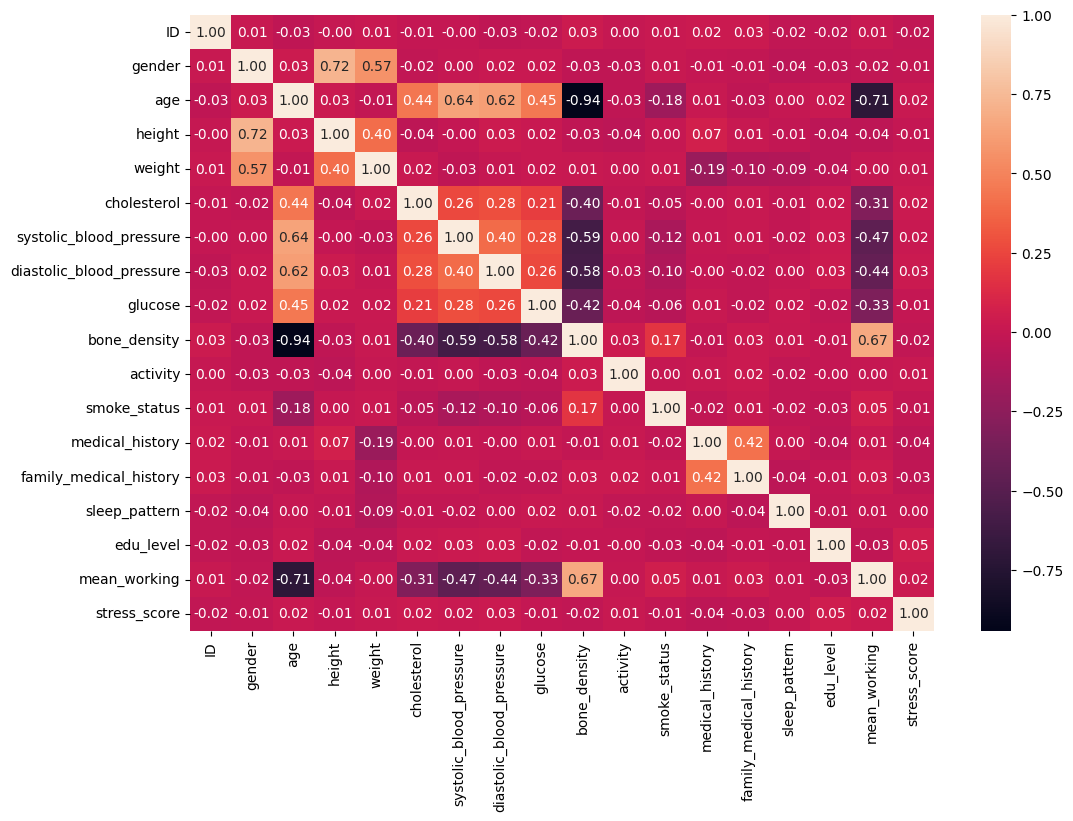

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train.corr(numeric_only=True)
plt.figure(figsize=[12,8])
sns.heatmap(corr,annot=True,fmt='.2f')

In [7]:
train_df = train.drop("ID", axis=1)
test = test.drop("ID", axis=1)
train_df

,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,0,72,161.49,58.47,279.84,165,100,143.35,0.87,2,1,2,0,2,0,0.0,0.63
1,1,88,179.87,77.60,257.37,178,111,146.94,0.07,2,1,3,0,0,1,0.0,0.83
2,1,47,182.47,89.93,226.66,134,95,142.61,1.18,1,1,3,3,0,2,9.0,0.70
3,1,69,185.78,68.63,206.74,158,92,137.26,0.48,0,1,2,3,1,1,0.0,0.17
4,0,81,164.63,71.53,255.92,171,116,129.37,0.34,2,1,0,0,2,0,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,87,174.43,77.14,233.31,176,111,134.71,0.20,1,2,3,3,1,3,0.0,0.02
2996,1,25,171.44,51.67,196.89,143,86,111.91,1.75,2,0,3,3,0,2,9.0,0.16
2997,0,54,162.13,55.54,210.52,164,91,136.47,0.80,1,0,3,3,0,3,9.0,0.16
2998,1,70,181.32,82.20,234.10,182,91,144.89,0.58,2,2,3,3,1,2,0.0,0.18


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def scalering(df, cols, scaler, fit):
  df = df.copy()
  if fit:
    df[cols] = scaler.fit_transform(df[cols])
  else:
    df[cols] = scaler.transform(df[cols])
  return df

scaler = MinMaxScaler()
X_train = train_df.drop('stress_score', axis=1)
y_train = train_df['stress_score']

X_tr, X_vr, y_tr, y_vr = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

cols = [c for c in X_train.columns if c not in exclude_list]
X_tr = scalering(X_tr, cols, scaler, True)
X_vr = scalering(X_vr, cols, scaler, False)
test_scaled = scalering(test, cols, scaler, False)

In [12]:
default_params = {
    "XGB": {
        "n_estimators": 1000,
        "learning_rate": 0.05,
        "max_depth": 7,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "random_state": 42,
        "n_jobs": -1,
        "verbosity": 0
    },
    "LGBM": {
        "n_estimators": 1000,
        "learning_rate": 0.05,
        "max_depth": -1,
        "num_leaves": 63,
        "subsample": 0.8,
        "random_state": 42,
        "n_jobs": -1,
        "verbose": -1
    },
    "CatBoost": {
        "iterations": 1000,
        "learning_rate": 0.05,
        "depth": 7,
        "l2_leaf_reg": 3,
        "subsample": 0.8,
        "random_seed": 42,
        "verbose": 0,
        "task_type": "CPU",
        "loss_function": "RMSE"
    }
}

model_builders = {
    "XGB": lambda: XGBRegressor(**default_params["XGB"]),
    "LGBM": lambda: LGBMRegressor(**default_params["LGBM"]),
    "CatBoost": lambda: CatBoostRegressor(**default_params["CatBoost"])
}

In [14]:
from sklearn.metrics import mean_absolute_error

best_model = None
best_score = float("inf")
best_name = None

for name, build in model_builders.items():
    model = build()
    if name == "XGB":
        model.set_params(eval_metric="mae")
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_vr, y_vr)],
            verbose=False
        )
    elif name == "LGBM":
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_vr, y_vr)],
            eval_metric="mae",
        )
    elif name == "CatBoost":
        model.fit(
            X_tr, y_tr,
            eval_set=(X_vr, y_vr),
            use_best_model=True,
            verbose=False
        )
    else:
        model.fit(X_tr, y_tr)

    y_pred = model.predict(X_vr)
    mae = mean_absolute_error(y_vr, y_pred)
    print(f"{name}: MAE={mae:.6f}")

    if mae < best_score:
        best_score = mae
        best_model = model
        best_name = name

print(f"\nBest Model (valid MAE): {best_name} | MAE={best_score:.6f}")

# --- 테스트 예측
result = best_model.predict(test_scaled)

XGB: MAE=0.163628
LGBM: MAE=0.165698
CatBoost: MAE=0.183142

Best Model (valid MAE): XGB | MAE=0.163628


In [18]:
submission_path = os.path.join(path, "sample_submission.csv")
submission = pd.read_csv(submission_path, encoding='utf-8')
submission['stress_score'] = result
submission.to_csv("../result/0819_stress.csv",index=False)